## Compétition régression data science salaries

### Importation des librairies

In [5]:
# Importation des librairies
import pandas as pd #Librrairie Pandas
import numpy as np #Librairie numpy

import matplotlib.pyplot as plt #Librairie matplotlib

import seaborn as sns # Seaborn


from sklearn.preprocessing import LabelEncoder, StandardScaler # Pour coder les variables
from sklearn.model_selection import train_test_split  # Pour partager les données en base d'apprentissages et de validation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # Parametre de comparaison de modele

# Certains models de régreesion de SKLEARN
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import  ExtraTreesRegressor

# Autres algo modeles 
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

### Importation des données

In [6]:
#Importation des données 
df= pd.read_csv('C:/Users/bahas/Downloads/ds_salaries.csv')

#Affichage des 5 premières lignes
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Préparation des données 

#### Suppression de la colonne "Unnamed"

In [7]:
#Suppresion de la colonne Unnamed
df = df.drop(['Unnamed: 0'], axis=1)

#### Nature des variables 

In [8]:
#Type de données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Nous remarquons que nous avons 4 variables quantitatives et 7 variables qualitatives

#### Codage des variables catégorielles 

Un modèle de machine learning ne peut malheureusement pas traiter les variables catégorielles (sauf pour certains modèles comme LightGBM). Par conséquent, nous devons trouver un moyen de coder (représenter) ces variables sous forme de nombres avant de les transmettre au modèle.  C'est pourquoi nous devons nous occuper des variables catégorielles.

Pour ce faire, nous utilisons la méthode Label encoding pour ne pas augmentation du nombre de variables. Elle consiste à affecter chaque modalité d'une variable catégorielle à un nombre entier. Aucune nouvelle colonne n'est créée. 

In [9]:
# Codage des variables catégorielles 
encoder = LabelEncoder()

df["experience_level"] = encoder.fit_transform(df["experience_level"])
df["employment_type"] = encoder.fit_transform(df["employment_type"])
df["job_title"] = encoder.fit_transform(df["job_title"])
df["salary_currency"] = encoder.fit_transform(df["salary_currency"])
df["employee_residence"] = encoder.fit_transform(df["employee_residence"])
df["company_location"] = encoder.fit_transform(df["company_location"])
df["company_size"] = encoder.fit_transform(df["company_size"])

In [10]:
#Vérification des types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int32
 2   employment_type     607 non-null    int32
 3   job_title           607 non-null    int32
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int32
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int32
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int32
 10  company_size        607 non-null    int32
dtypes: int32(7), int64(4)
memory usage: 35.7 KB


In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


#### Définition de la variable expliqué et les variables explicatives

In [12]:
#Définition des variables explicatives
X = np.array(df.loc[:, ~df.columns.isin(['salary','salary_in_usd', 'salary_currency'])])
X.shape

(607, 8)

In [13]:
#Définition de la target
y = np.array(df["salary_in_usd"])
y.shape

(607,)

#### Standardisation des variables explicatives

In [14]:
#Standardisation des données 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Calcul de la matrice de corrélation 

In [15]:
#Matrice coorelation
corr_mat = df.loc[:,~df.columns.isin(['salary', 'salary_currency'])].corr()
corr_mat

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.031011,-0.151205,-0.081742,0.022070,-0.066554,1.000000


#### Représentation graphique de la matrice de corrélation

<AxesSubplot:>

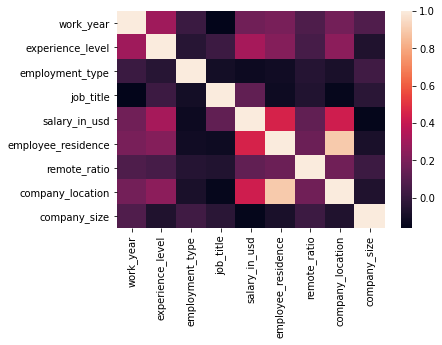

In [16]:
#représentation graphique de la matrice de corelation 
sns.heatmap(corr_mat)

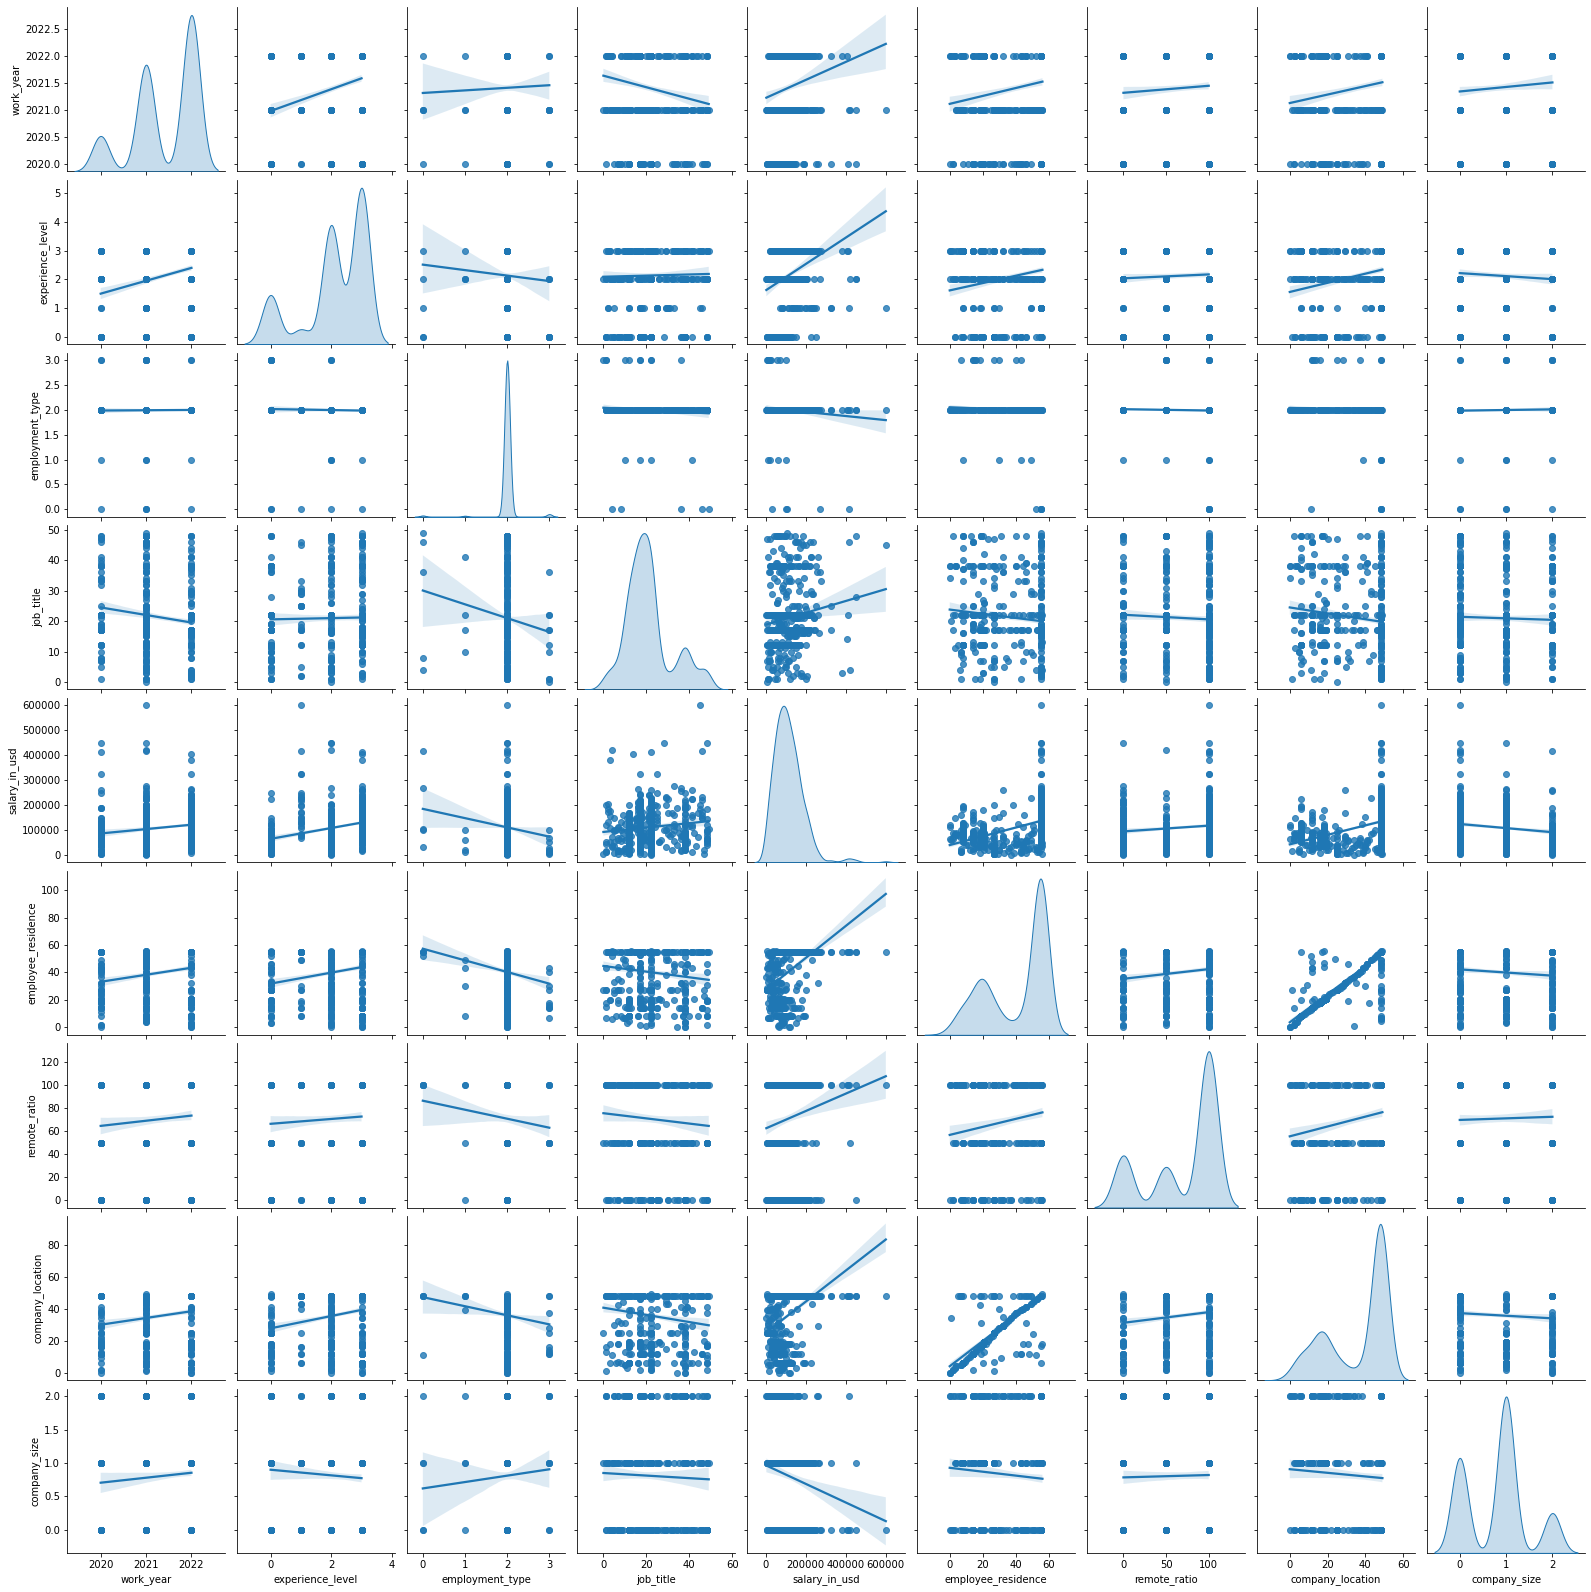

In [17]:
sns.pairplot(df.loc[:,~df.columns.isin(['salary', 'salary_currency'])], kind="reg", diag_kind="kde")

#### Boxplote des salaires en $ 

C:\Users\bahas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_in_usd'>

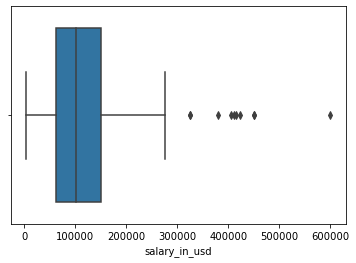

In [18]:
#Boxplote des salaires en $ 
plt.figure()
sns.boxplot( df["salary_in_usd"], data=df)

#### Partage de la base de données en données d'entrainement et de validation 

In [19]:
#Partage des données en en données d'entrainement et données test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, shuffle=True)

Nous avons découpé notre base de données en deux sous échantillons. 80 % en échantillon d’apprentissage et 20% en données de validations.

### Entrainement des modèles 

In [20]:
#Régresion linéaire 
regRL = LinearRegression()
regRL.fit(X_train, y_train)
y_pred_regRL = regRL.predict(X_test)


# Modèle de forêt aleatoire 
regRF = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=10, 
                            random_state=1)
regRF.fit(X_train, y_train)
y_pred_regRF = regRF.predict(X_test)


# Modele de Support Vecteur Machine 
regSVR = SVR(kernel='linear',C=50.0, epsilon=0.2)
regSVR.fit(X_train, y_train)
y_pred_regSVR = regSVR.predict(X_test)


#Bayes ridge 
regBR = linear_model.BayesianRidge()
regBR.fit(X_train, y_train)
y_pred_regBR = regBR.predict(X_test)


#Boost
regXGB = XGBRegressor()
regXGB.fit(X_train, y_train)
y_pred_regXGB = regXGB.predict(X_test)


#LGBMR
regLGBM = LGBMRegressor()
regLGBM.fit(X_train, y_train)
y_pred_regLGBM = regLGBM.predict(X_test)


#CatBoost
regCatB = CatBoostRegressor()
regCatB.fit(X_train, y_train)
y_pred_regCatB = regCatB.predict(X_test)


#PLSRegression
regPLS = PLSRegression(n_components=2)
regPLS.fit(X_train, y_train)
y_pred_regPLS = regPLS.predict(X_test)


#SGDRegression
regSGDR = SGDRegressor(max_iter=1000, tol=1e-3)
regSGDR.fit(X_train, y_train)
y_pred_regSGDR = regSGDR.predict(X_test)

#ExtraTreesRegressor
regET=ExtraTreesRegressor(n_estimators = 120)
regET.fit(X_train, y_train)
y_predict=regET.predict(X_test)

Learning rate set to 0.03652
0:	learn: 69867.5695554	total: 176ms	remaining: 2m 56s
1:	learn: 69033.0444427	total: 179ms	remaining: 1m 29s
2:	learn: 68170.8104491	total: 181ms	remaining: 1m
3:	learn: 67421.0624336	total: 182ms	remaining: 45.4s
4:	learn: 66570.1261990	total: 184ms	remaining: 36.6s
5:	learn: 65864.7155423	total: 185ms	remaining: 30.7s
6:	learn: 65067.8943429	total: 187ms	remaining: 26.5s
7:	learn: 64306.4529393	total: 188ms	remaining: 23.4s
8:	learn: 63596.9887649	total: 190ms	remaining: 21s
9:	learn: 62928.5840567	total: 192ms	remaining: 19s
10:	learn: 62388.7507070	total: 194ms	remaining: 17.4s
11:	learn: 61754.4538790	total: 196ms	remaining: 16.1s
12:	learn: 61355.6353076	total: 197ms	remaining: 14.9s
13:	learn: 60744.4507622	total: 198ms	remaining: 14s
14:	learn: 60191.3216466	total: 200ms	remaining: 13.1s
15:	learn: 59556.9253234	total: 201ms	remaining: 12.4s
16:	learn: 59011.6498034	total: 203ms	remaining: 11.7s
17:	learn: 58543.5026730	total: 205ms	remaining: 11.2

352:	learn: 33798.6904836	total: 485ms	remaining: 889ms
353:	learn: 33783.3726918	total: 486ms	remaining: 887ms
354:	learn: 33768.6076644	total: 487ms	remaining: 884ms
355:	learn: 33719.8704365	total: 487ms	remaining: 882ms
356:	learn: 33705.4363874	total: 488ms	remaining: 879ms
357:	learn: 33672.8176938	total: 489ms	remaining: 876ms
358:	learn: 33650.2396009	total: 489ms	remaining: 873ms
359:	learn: 33601.6673980	total: 490ms	remaining: 871ms
360:	learn: 33586.2760133	total: 490ms	remaining: 868ms
361:	learn: 33562.3877484	total: 491ms	remaining: 865ms
362:	learn: 33552.0183606	total: 492ms	remaining: 863ms
363:	learn: 33542.2484669	total: 492ms	remaining: 860ms
364:	learn: 33506.0667953	total: 493ms	remaining: 857ms
365:	learn: 33453.6969150	total: 493ms	remaining: 855ms
366:	learn: 33439.8007786	total: 494ms	remaining: 852ms
367:	learn: 33400.2934585	total: 495ms	remaining: 849ms
368:	learn: 33365.1833326	total: 495ms	remaining: 847ms
369:	learn: 33345.7667215	total: 496ms	remaining

633:	learn: 29445.3290683	total: 652ms	remaining: 376ms
634:	learn: 29444.2790485	total: 652ms	remaining: 375ms
635:	learn: 29418.4439512	total: 653ms	remaining: 374ms
636:	learn: 29411.7743304	total: 654ms	remaining: 373ms
637:	learn: 29400.6795966	total: 655ms	remaining: 372ms
638:	learn: 29396.0788662	total: 655ms	remaining: 370ms
639:	learn: 29380.0413032	total: 656ms	remaining: 369ms
640:	learn: 29377.1671036	total: 656ms	remaining: 368ms
641:	learn: 29373.0844980	total: 657ms	remaining: 366ms
642:	learn: 29363.2479967	total: 657ms	remaining: 365ms
643:	learn: 29353.6330863	total: 658ms	remaining: 364ms
644:	learn: 29350.2308969	total: 658ms	remaining: 362ms
645:	learn: 29338.5575186	total: 659ms	remaining: 361ms
646:	learn: 29332.6185609	total: 659ms	remaining: 360ms
647:	learn: 29312.0936079	total: 660ms	remaining: 358ms
648:	learn: 29302.9372604	total: 660ms	remaining: 357ms
649:	learn: 29297.8674742	total: 661ms	remaining: 356ms
650:	learn: 29293.4764319	total: 661ms	remaining

917:	learn: 27406.6636839	total: 798ms	remaining: 71.3ms
918:	learn: 27405.4314217	total: 799ms	remaining: 70.4ms
919:	learn: 27401.2805670	total: 799ms	remaining: 69.5ms
920:	learn: 27400.3681306	total: 800ms	remaining: 68.6ms
921:	learn: 27396.9890505	total: 800ms	remaining: 67.7ms
922:	learn: 27394.4418590	total: 801ms	remaining: 66.8ms
923:	learn: 27387.8563781	total: 801ms	remaining: 65.9ms
924:	learn: 27384.1958141	total: 801ms	remaining: 65ms
925:	learn: 27363.3943287	total: 802ms	remaining: 64.1ms
926:	learn: 27360.9520076	total: 802ms	remaining: 63.2ms
927:	learn: 27354.3913766	total: 803ms	remaining: 62.3ms
928:	learn: 27349.4281724	total: 803ms	remaining: 61.4ms
929:	learn: 27345.0277798	total: 804ms	remaining: 60.5ms
930:	learn: 27340.8523530	total: 804ms	remaining: 59.6ms
931:	learn: 27336.4533463	total: 805ms	remaining: 58.7ms
932:	learn: 27333.7967750	total: 805ms	remaining: 57.8ms
933:	learn: 27331.7761080	total: 806ms	remaining: 56.9ms
934:	learn: 27330.2172617	total: 

#### Evaluation des modèles

In [21]:
#Score des modeles sur les données d'apprentissage
pd.DataFrame.from_dict({"Regresion linéaire" : [regRL.score(X_train, y_train)],
"Modèle de forêt aleatoire" : [regRF.score(X_train, y_train)],
"Modele de Support Vecteur Machine " : [regSVR.score(X_train, y_train)],
"Bayes ridge" : [regBR.score(X_train, y_train)],
"XGBoost" : [regXGB.score(X_train, y_train)],
"LGBMR " : [regLGBM.score(X_train, y_train)],
"CatBoost ": [regCatB.score(X_train, y_train)],
"PLSRegression ":[regPLS.score(X_train, y_train)],
"SGDRegression" : [regSGDR.score(X_train, y_train)],
"ExtraTreesRegressor ": [regET.score(X_train, y_train)]}, orient = 'index', columns = ['Score'])

,Score
Regresion linéaire,0.337394
Modèle de forêt aleatoire,0.552821
Modele de Support Vecteur Machine,0.202738
Bayes ridge,0.336440
XGBoost,0.886811
LGBMR,0.706650
CatBoost,0.855195
PLSRegression,0.333123
SGDRegression,0.337022
ExtraTreesRegressor,0.887475


Nous remarquons que les modèles XGBoost (0.897089), CatBoost (0.862814) et ExtraTreesRegressor (0.898123) détiennent un score supérieur à de 80 

#### Evaluation de nos modèles sur les données de validations

In [22]:
pd.DataFrame.from_dict({"Forêt aleatoire" :[mean_absolute_error(y_test, y_pred_regRF), mean_squared_error(y_test, y_pred_regRF), r2_score(y_test, y_pred_regRF)],
"Boost" : [ mean_absolute_error(y_test, y_pred_regXGB), mean_squared_error(y_test, y_pred_regXGB), r2_score(y_test, y_pred_regXGB)],
"LGBMR " : [ mean_absolute_error(y_test, y_pred_regLGBM), mean_squared_error(y_test, y_pred_regLGBM), r2_score(y_test, y_pred_regLGBM)],
"CatBoost ": [mean_absolute_error(y_test, y_pred_regCatB), mean_squared_error(y_test, y_pred_regCatB), r2_score(y_test, y_pred_regCatB)],
"ExtraTreesRegressor ": [mean_absolute_error(y_test, y_predict), mean_squared_error(y_test, y_predict), r2_score(y_test, y_predict)]}, orient = 'index',columns = ['mean_absolute_error', 'mean_squared_error','r2_score'])

,mean_absolute_error,mean_squared_error,r2_score
Forêt aleatoire,35217.301781,3.249943e+09,0.342563
Boost,35842.505958,3.637840e+09,0.264094
LGBMR,35754.844415,3.174739e+09,0.357776
CatBoost,34386.326277,3.126149e+09,0.367605
ExtraTreesRegressor,35560.077893,3.169136e+09,0.358909


Nous remarquons que les 5 modèles ne sont pas efficaces sur des nouvelles données

#### Suppression des valeurs aberrantes 

Nous allons améliorer nos modèles en supprimant les valeurs aberrantes sur la variable d'intérêt.  

In [23]:
print("Taille de la dataset: ", df.shape)

Taille de la dataset:  (607, 11)


In [24]:
#Suppression des valeur aberrantes 
upper = np.where(df['salary_in_usd'] >= 300000)
df.drop(upper[0], inplace = True)

In [25]:
print("Taille de la nouvelle data set: ", df.shape)

Taille de la nouvelle data set:  (597, 11)


C:\Users\bahas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary_in_usd'>

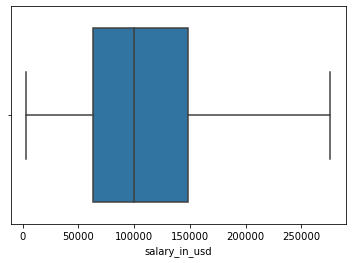

In [26]:
#Boxplot des salaire en $
plt.figure()
sns.boxplot( df["salary_in_usd"])

In [27]:
#Définition des variables expliquatives
X = np.array(df.loc[:, ~df.columns.isin(['salary','salary_in_usd', 'salary_currency'])])

#Définition de la target
y = np.array(df["salary_in_usd"])

#Standardisation des données 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#Partage des données en en données d'entrainement et données test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, shuffle=True)

In [29]:
# Modèle de forêt aleatoire 
regRF = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=10, 
                            random_state=1)
regRF.fit(X_train, y_train)
y_pred_regRF = regRF.predict(X_test)

#Boost
regXGB = XGBRegressor()
regXGB.fit(X_train, y_train)
y_pred_regXGB = regXGB.predict(X_test)


#LGBMR
regLGBM = LGBMRegressor()
regLGBM.fit(X_train, y_train)
y_pred_regLGBM = regLGBM.predict(X_test)


#CatBoost
regCatB = CatBoostRegressor()
regCatB.fit(X_train, y_train)
y_pred_regCatB = regCatB.predict(X_test)

#ExtraTreesRegressor
regET=ExtraTreesRegressor(n_estimators = 120)
regET.fit(X_train, y_train)
y_predict=regET.predict(X_test)

Learning rate set to 0.036424
0:	learn: 58563.1643723	total: 583us	remaining: 583ms
1:	learn: 57765.6801076	total: 1.28ms	remaining: 638ms
2:	learn: 56979.9447919	total: 1.82ms	remaining: 605ms
3:	learn: 56183.9929051	total: 2.36ms	remaining: 588ms
4:	learn: 55402.8105855	total: 2.95ms	remaining: 587ms
5:	learn: 54766.1756532	total: 3.31ms	remaining: 548ms
6:	learn: 54169.7487211	total: 3.9ms	remaining: 553ms
7:	learn: 53516.8901785	total: 4.41ms	remaining: 547ms
8:	learn: 52880.8482533	total: 4.88ms	remaining: 538ms
9:	learn: 52296.4798097	total: 5.61ms	remaining: 555ms
10:	learn: 51622.3042814	total: 6.22ms	remaining: 559ms
11:	learn: 51081.9494775	total: 6.79ms	remaining: 559ms
12:	learn: 50588.9009303	total: 7.33ms	remaining: 556ms
13:	learn: 50051.9261640	total: 7.8ms	remaining: 549ms
14:	learn: 49458.6795721	total: 8.27ms	remaining: 543ms
15:	learn: 48914.9728215	total: 8.74ms	remaining: 538ms
16:	learn: 48454.2467316	total: 9.22ms	remaining: 533ms
17:	learn: 48048.3732544	total:

331:	learn: 28558.4545827	total: 155ms	remaining: 312ms
332:	learn: 28534.0251294	total: 155ms	remaining: 311ms
333:	learn: 28529.7991666	total: 156ms	remaining: 312ms
334:	learn: 28515.6499571	total: 157ms	remaining: 312ms
335:	learn: 28496.9918703	total: 157ms	remaining: 311ms
336:	learn: 28483.7692931	total: 158ms	remaining: 310ms
337:	learn: 28469.0383514	total: 158ms	remaining: 310ms
338:	learn: 28446.5102810	total: 159ms	remaining: 310ms
339:	learn: 28430.9573392	total: 159ms	remaining: 309ms
340:	learn: 28410.4193889	total: 160ms	remaining: 309ms
341:	learn: 28401.8856419	total: 160ms	remaining: 308ms
342:	learn: 28379.3142015	total: 161ms	remaining: 308ms
343:	learn: 28376.6607170	total: 161ms	remaining: 307ms
344:	learn: 28354.9284424	total: 162ms	remaining: 307ms
345:	learn: 28344.2157626	total: 162ms	remaining: 306ms
346:	learn: 28336.8772609	total: 163ms	remaining: 306ms
347:	learn: 28314.4785840	total: 163ms	remaining: 306ms
348:	learn: 28302.1424974	total: 164ms	remaining

673:	learn: 24983.8398225	total: 312ms	remaining: 151ms
674:	learn: 24979.7321155	total: 312ms	remaining: 150ms
675:	learn: 24970.6082882	total: 313ms	remaining: 150ms
676:	learn: 24961.9999749	total: 314ms	remaining: 150ms
677:	learn: 24960.2055133	total: 315ms	remaining: 149ms
678:	learn: 24950.1613857	total: 315ms	remaining: 149ms
679:	learn: 24942.7483622	total: 316ms	remaining: 148ms
680:	learn: 24936.5682815	total: 316ms	remaining: 148ms
681:	learn: 24932.4689560	total: 316ms	remaining: 148ms
682:	learn: 24929.4893992	total: 317ms	remaining: 147ms
683:	learn: 24926.6671655	total: 317ms	remaining: 147ms
684:	learn: 24922.8016016	total: 318ms	remaining: 146ms
685:	learn: 24917.8595857	total: 318ms	remaining: 146ms
686:	learn: 24916.9026519	total: 319ms	remaining: 145ms
687:	learn: 24913.7815893	total: 319ms	remaining: 145ms
688:	learn: 24912.6978181	total: 319ms	remaining: 144ms
689:	learn: 24908.5660953	total: 320ms	remaining: 144ms
690:	learn: 24902.0422177	total: 320ms	remaining

980:	learn: 23846.6242252	total: 467ms	remaining: 9.04ms
981:	learn: 23843.8131720	total: 467ms	remaining: 8.57ms
982:	learn: 23843.5462816	total: 468ms	remaining: 8.09ms
983:	learn: 23843.1705381	total: 469ms	remaining: 7.62ms
984:	learn: 23840.0242665	total: 469ms	remaining: 7.14ms
985:	learn: 23838.8203448	total: 470ms	remaining: 6.67ms
986:	learn: 23834.5684892	total: 470ms	remaining: 6.19ms
987:	learn: 23833.3099559	total: 471ms	remaining: 5.71ms
988:	learn: 23832.1719780	total: 471ms	remaining: 5.24ms
989:	learn: 23830.1272152	total: 472ms	remaining: 4.77ms
990:	learn: 23829.8006271	total: 472ms	remaining: 4.29ms
991:	learn: 23827.7645095	total: 473ms	remaining: 3.81ms
992:	learn: 23824.6554438	total: 473ms	remaining: 3.34ms
993:	learn: 23824.4406535	total: 474ms	remaining: 2.86ms
994:	learn: 23822.7494014	total: 474ms	remaining: 2.38ms
995:	learn: 23818.0804769	total: 475ms	remaining: 1.91ms
996:	learn: 23815.6831623	total: 476ms	remaining: 1.43ms
997:	learn: 23814.0127288	total

In [30]:
pd.DataFrame.from_dict({"Forêt aleatoire" : [regRF.score(X_train, y_train)],
"XGBoost" : [regXGB.score(X_train, y_train)],
"LGBMR " : [regLGBM.score(X_train, y_train)],
"CatBoost ": [regCatB.score(X_train, y_train)],
"ExtraTreesRegressor ": [regET.score(X_train, y_train)]}, orient = 'index', columns = ['Score'])

,Score
Forêt aleatoire,0.593442
XGBoost,0.858353
LGBMR,0.734554
CatBoost,0.839924
ExtraTreesRegressor,0.859821


In [31]:
pd.DataFrame.from_dict({"Forêt aleatoire" :[mean_absolute_error(y_test, y_pred_regRF), mean_squared_error(y_test, y_pred_regRF), r2_score(y_test, y_pred_regRF)],
"XGBoost" : [ mean_absolute_error(y_test, y_pred_regXGB), mean_squared_error(y_test, y_pred_regXGB), r2_score(y_test, y_pred_regXGB)],
"LGBMR " : [ mean_absolute_error(y_test, y_pred_regLGBM), mean_squared_error(y_test, y_pred_regLGBM), r2_score(y_test, y_pred_regLGBM)],
"CatBoost ": [mean_absolute_error(y_test, y_pred_regCatB), mean_squared_error(y_test, y_pred_regCatB), r2_score(y_test, y_pred_regCatB)],
"ExtraTreesRegressor ": [mean_absolute_error(y_test, y_predict), mean_squared_error(y_test, y_predict), r2_score(y_test, y_predict)]}, orient = 'index',columns = ['mean_absolute_error', 'mean_squared_error','r2_score'])

,mean_absolute_error,mean_squared_error,r2_score
Forêt aleatoire,27687.795893,1.440916e+09,0.511884
XGBoost,28418.873812,1.452509e+09,0.507956
LGBMR,27935.631239,1.366442e+09,0.537112
CatBoost,27644.754028,1.331479e+09,0.548956
ExtraTreesRegressor,31213.985264,1.678240e+09,0.431489


#### Représentation graphique des prédictions des modèles  

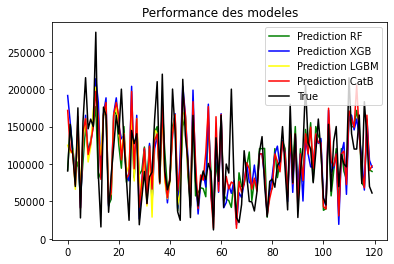

In [32]:
plt.title('Performance des modeles')

plt.plot(list(y_pred_regRF)[:250], label='Prediction RF', color="green")
plt.plot(list(y_pred_regXGB)[:250], label='Prediction XGB', color="blue")
plt.plot(list(y_pred_regLGBM)[:50], label='Prediction LGBM', color="yellow")
plt.plot(list(y_pred_regCatB)[:250], label='Prediction CatB', color="red")

plt.plot(list(y_test)[:250], label='True', color="black")
plt.legend()

### Reglage des parametre des modeles 

In [33]:
#XGBoost
regXGB = XGBRegressor( n_estimators= 150, 
                      base_score=0.5,  gamma=0,
                      learning_rate=0.1, max_delta_step=0,
                       max_depth=3, min_child_weight=1, 
                       n_jobs=1, random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
                      subsample=1, verbosity=1)

regXGB.fit(X_train, y_train)
y_pred_regXGB = regXGB.predict(X_test)


# Modèle de forêt aleatoire 
regRF = RandomForestRegressor(n_estimators=50,
                            min_samples_leaf=3, 
                            random_state=4)
                                                                                   
regRF.fit(X_train, y_train)
y_pred_regRF = regRF.predict(X_test)


#CatBoost
regCatB = CatBoostRegressor(iterations=200,
                        learning_rate=0.0991,
                        depth=5,
                        random_state=2,
                        )#loss_function='RMSE',
regCatB.fit(X_train, y_train)
y_pred_regCatB = regCatB.predict(X_test)


#LGBM
regLGBM = LGBMRegressor(n_estimators =220,
                        max_depth =15,
    min_child_samples=20,  subsample=1,  
    reg_alpha=10, reg_lambda=5, random_state=2
    )#
regLGBM.fit(X_train, y_train)
y_pred_regLGBM = regLGBM.predict(X_test)

y_predict=regET.predict(X_test)


#ExtraTrees
regET=ExtraTreesRegressor(n_estimators = 195, 
                          max_depth=15, 
                          min_samples_split= 5, 
                          min_samples_leaf= 1,  
                          max_features= 2,
                          random_state=2 , 
                          ccp_alpha=0.1
                         )
regET.fit(X_train, y_train)
y_predict=regET.predict(X_test)


0:	learn: 57082.3626694	total: 731us	remaining: 146ms
1:	learn: 55003.6340260	total: 1.94ms	remaining: 192ms
2:	learn: 53181.3199758	total: 2.69ms	remaining: 176ms
3:	learn: 51665.1001440	total: 3.74ms	remaining: 183ms
4:	learn: 50166.7186539	total: 4.5ms	remaining: 176ms
5:	learn: 49002.2428822	total: 5.26ms	remaining: 170ms
6:	learn: 47778.8309024	total: 5.97ms	remaining: 165ms
7:	learn: 46777.3899103	total: 6.64ms	remaining: 159ms
8:	learn: 45835.5581872	total: 7.34ms	remaining: 156ms
9:	learn: 45069.2311610	total: 8.03ms	remaining: 153ms
10:	learn: 44227.0946691	total: 8.73ms	remaining: 150ms
11:	learn: 43503.1095327	total: 9.68ms	remaining: 152ms
12:	learn: 42931.8957171	total: 10.4ms	remaining: 150ms
13:	learn: 42439.0676149	total: 11.5ms	remaining: 153ms
14:	learn: 41941.1137363	total: 12.4ms	remaining: 154ms
15:	learn: 41487.3853685	total: 13.2ms	remaining: 152ms
16:	learn: 40927.3262597	total: 14.3ms	remaining: 154ms
17:	learn: 40449.5726690	total: 15.7ms	remaining: 158ms
18:	

190:	learn: 27554.1556152	total: 146ms	remaining: 6.87ms
191:	learn: 27515.0865739	total: 146ms	remaining: 6.1ms
192:	learn: 27470.0777895	total: 147ms	remaining: 5.34ms
193:	learn: 27431.0060356	total: 148ms	remaining: 4.58ms
194:	learn: 27416.5730447	total: 149ms	remaining: 3.82ms
195:	learn: 27397.6284219	total: 150ms	remaining: 3.06ms
196:	learn: 27377.1964412	total: 150ms	remaining: 2.29ms
197:	learn: 27341.2018915	total: 151ms	remaining: 1.53ms
198:	learn: 27322.8295862	total: 152ms	remaining: 764us
199:	learn: 27304.1451015	total: 153ms	remaining: 0us


In [34]:
pd.DataFrame.from_dict({"Forêt aleatoire" :[mean_absolute_error(y_test, y_pred_regRF), mean_squared_error(y_test, y_pred_regRF), r2_score(y_test, y_pred_regRF)],
"XGBoost" : [ mean_absolute_error(y_test, y_pred_regXGB), mean_squared_error(y_test, y_pred_regXGB), r2_score(y_test, y_pred_regXGB)],
"LGBMR " : [ mean_absolute_error(y_test, y_pred_regLGBM), mean_squared_error(y_test, y_pred_regLGBM), r2_score(y_test, y_pred_regLGBM)],
"CatBoost ": [mean_absolute_error(y_test, y_pred_regCatB), mean_squared_error(y_test, y_pred_regCatB), r2_score(y_test, y_pred_regCatB)],
"ExtraTreesRegressor ": [mean_absolute_error(y_test, y_predict), mean_squared_error(y_test, y_predict), r2_score(y_test, y_predict)]}, orient = 'index',columns = ['mean_absolute_error', 'mean_squared_error','r2_score'])

,mean_absolute_error,mean_squared_error,r2_score
Forêt aleatoire,27290.639119,1.318824e+09,0.553243
XGBoost,27032.227669,1.307593e+09,0.557047
LGBMR,28986.597890,1.410734e+09,0.522108
CatBoost,27212.212360,1.296260e+09,0.560886
ExtraTreesRegressor,27848.530598,1.313735e+09,0.554967


Après suppression des valeurs aberrantes et reparamétrage des modèles, nous remarquons que le XGBoot est le meilleur modèle.

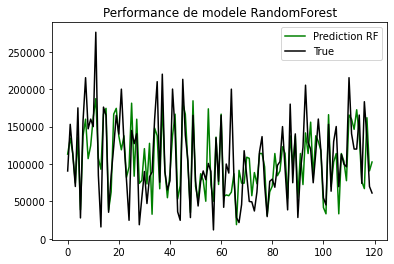

In [36]:
plt.title('Performance de modele RandomForest')

plt.plot(list(y_pred_regRF)[:250], label='Prediction RF', color="green")
plt.plot(list(y_test)[:250], label='True', color="black")
plt.legend()

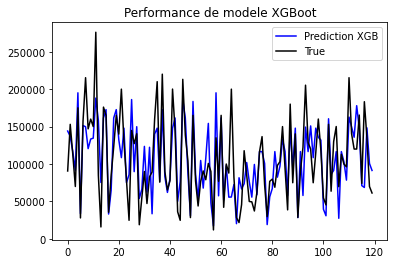

In [37]:
plt.title('Performance de modele XGBoost')

plt.plot(list(y_pred_regXGB)[:250], label='Prediction XGB', color="blue")

plt.plot(list(y_test)[:250], label='True', color="black")
plt.legend()

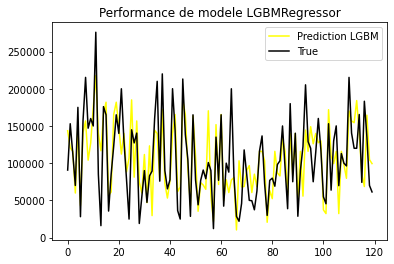

In [39]:
plt.title('Performance de modele LGBMRegressor')

plt.plot(list(y_pred_regLGBM)[:250], label='Prediction LGBM', color="yellow")

plt.plot(list(y_test)[:250], label='True', color="black")
plt.legend()

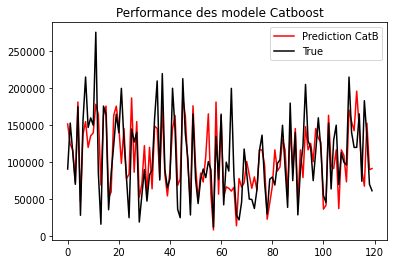

In [40]:
plt.title('Performance des modele Catboost')

plt.plot(list(y_pred_regCatB)[:250], label='Prediction CatB', color="red")

plt.plot(list(y_test)[:250], label='True', color="black")
plt.legend()

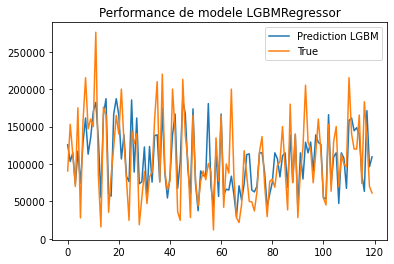

In [42]:
plt.title('Performance de modele "ExtraTreesRegressor')

plt.plot(list(y_predict)[:250], label='Prediction LGBM')

plt.plot(list(y_test)[:250], label='True')
plt.legend()